In [32]:
!nvidia-smi

Wed Jan  3 20:10:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              30W /  70W |   1003MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [35]:
from ultralytics import YOLO

from IPython.display import display, Image

## SEGMENTATION

In [36]:
model = YOLO(f'/content/yolov8s-seg.pt')

### Custom Training

In [37]:
!yolo task=segment mode=train model='/content/yolov8s-seg.pt' data='/content/drive/MyDrive/Visea_KITTI_Dataset/config.yaml' epochs=30 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/yolov8s-seg.pt, data=/content/drive/MyDrive/Visea_KITTI_Dataset/config.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [38]:
!ls runs/segment/train/

args.yaml					   MaskP_curve.png   train_batch50.jpg
BoxF1_curve.png					   MaskPR_curve.png  train_batch51.jpg
BoxP_curve.png					   MaskR_curve.png   train_batch52.jpg
BoxPR_curve.png					   results.csv	     val_batch0_labels.jpg
BoxR_curve.png					   results.png	     val_batch0_pred.jpg
confusion_matrix.png				   train_batch0.jpg  weights
events.out.tfevents.1704308054.548257607b19.788.0  train_batch1.jpg
MaskF1_curve.png				   train_batch2.jpg


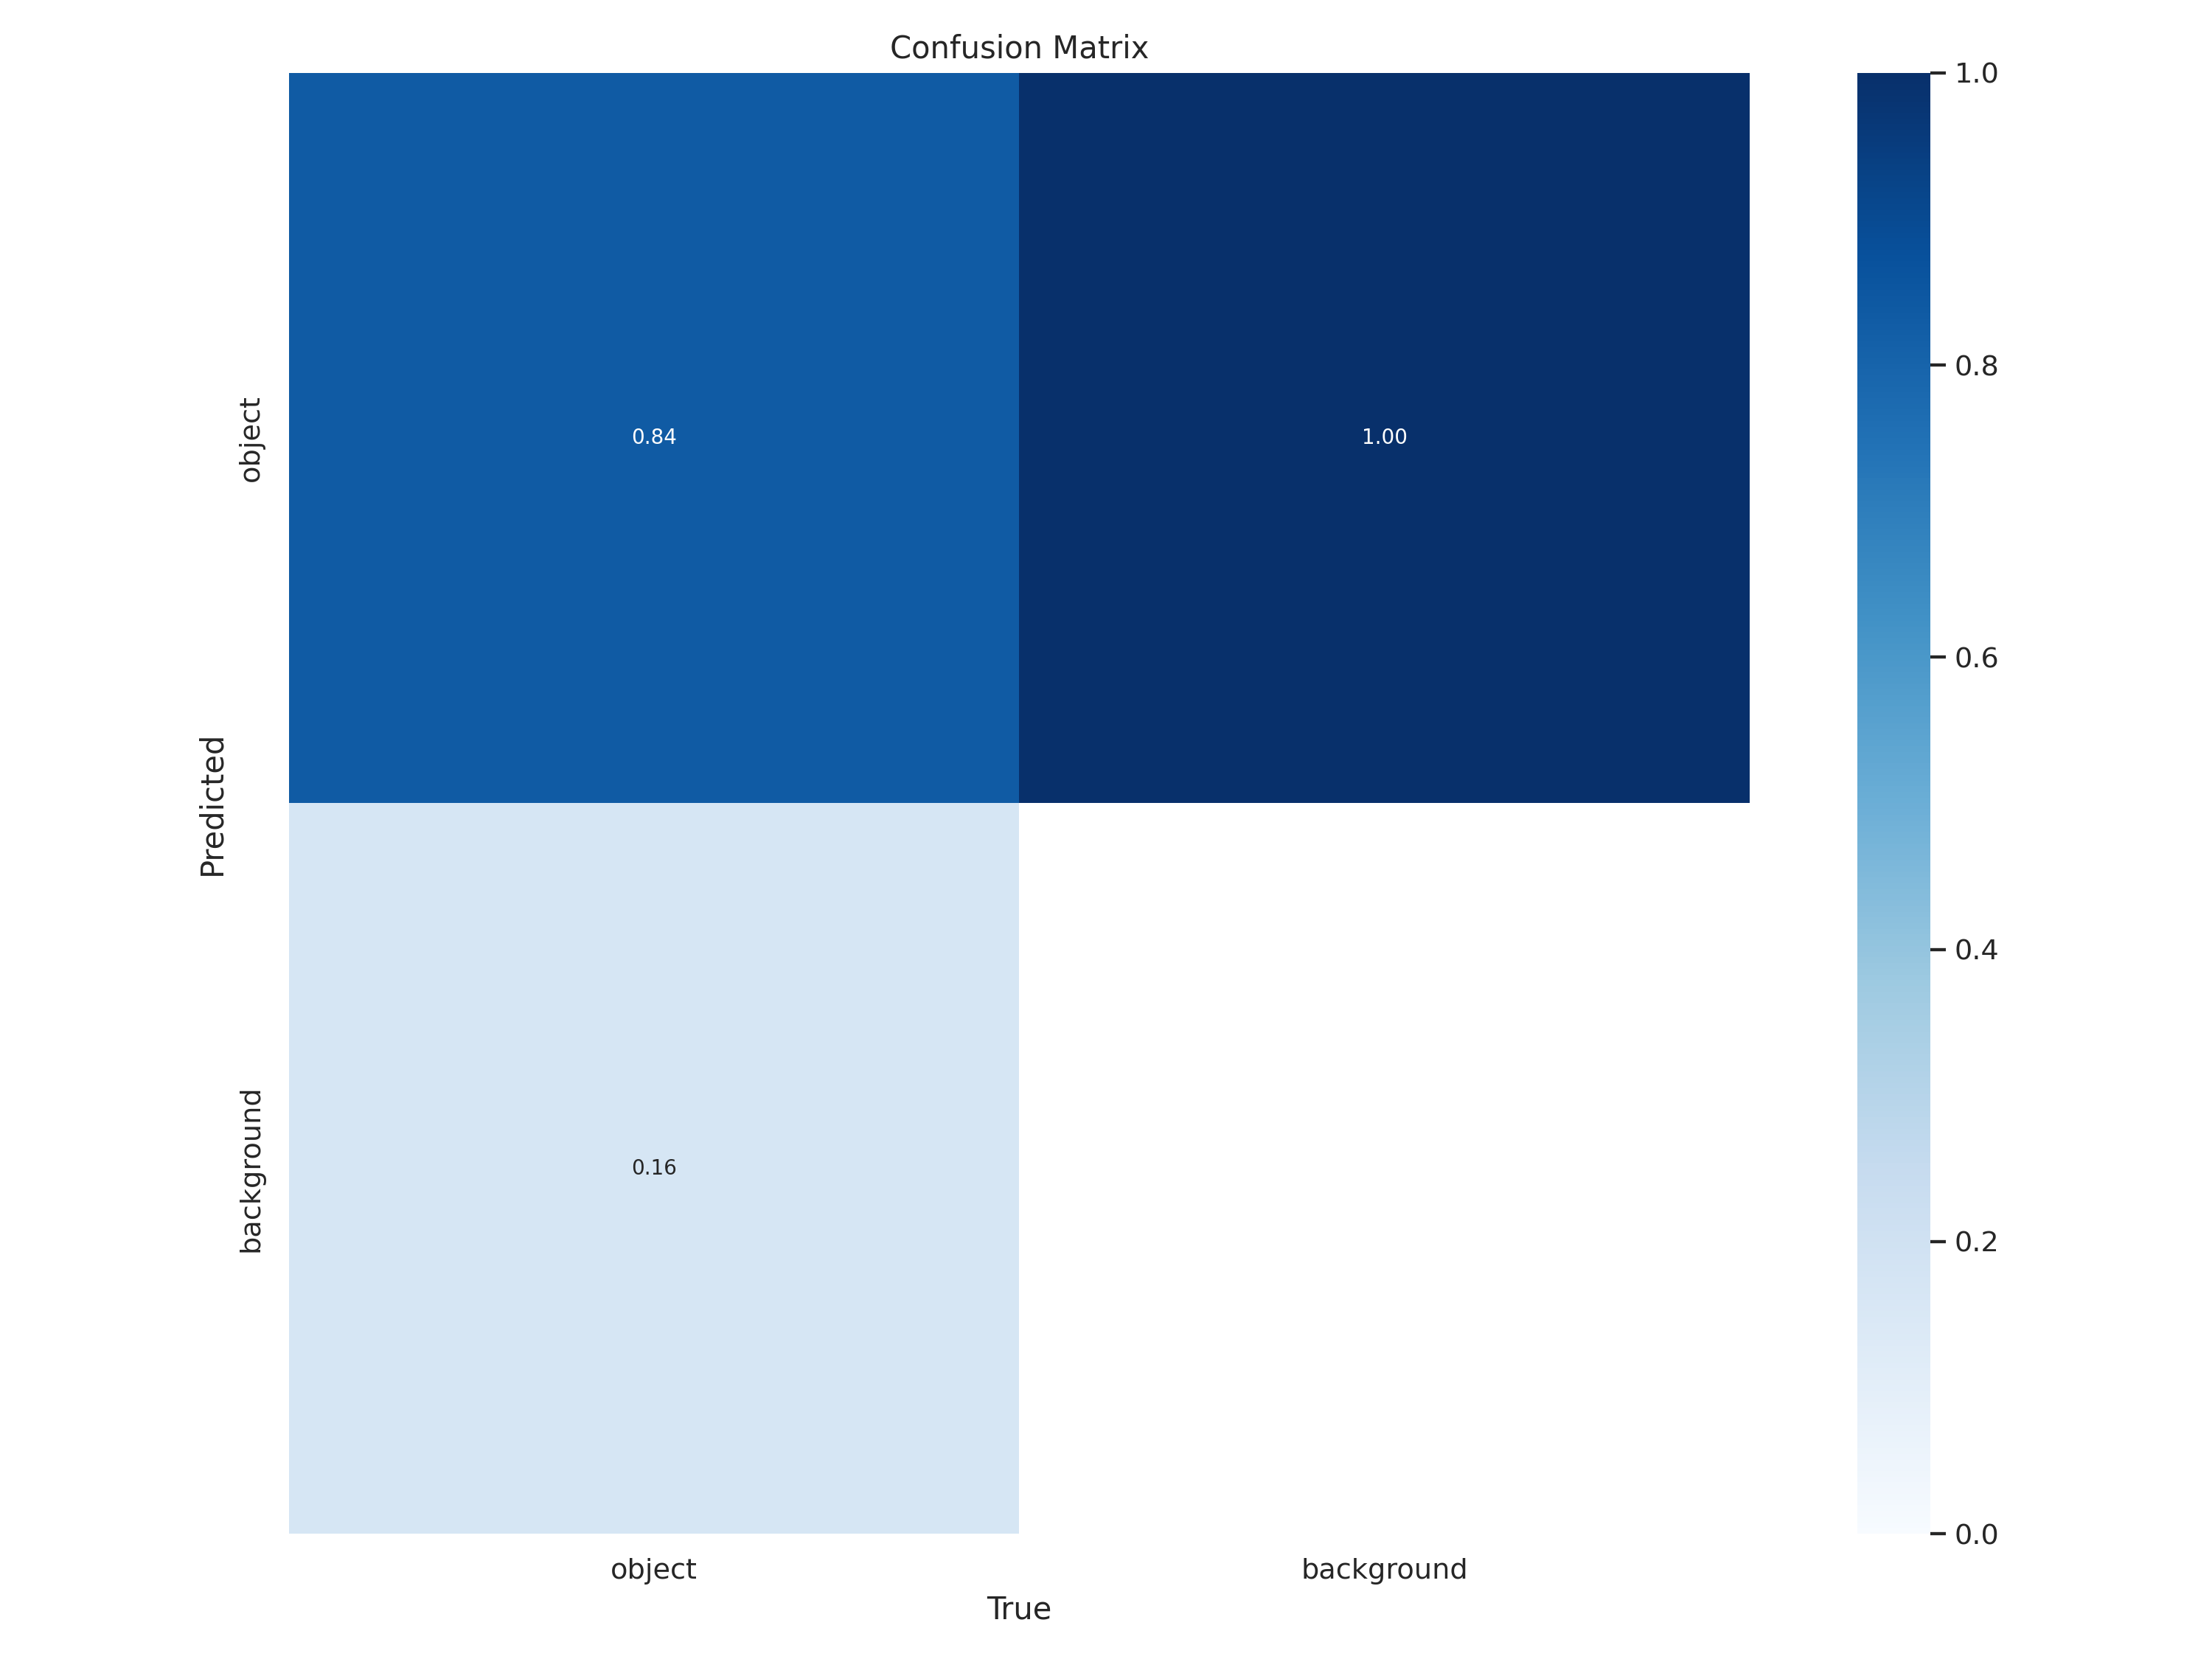

In [39]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

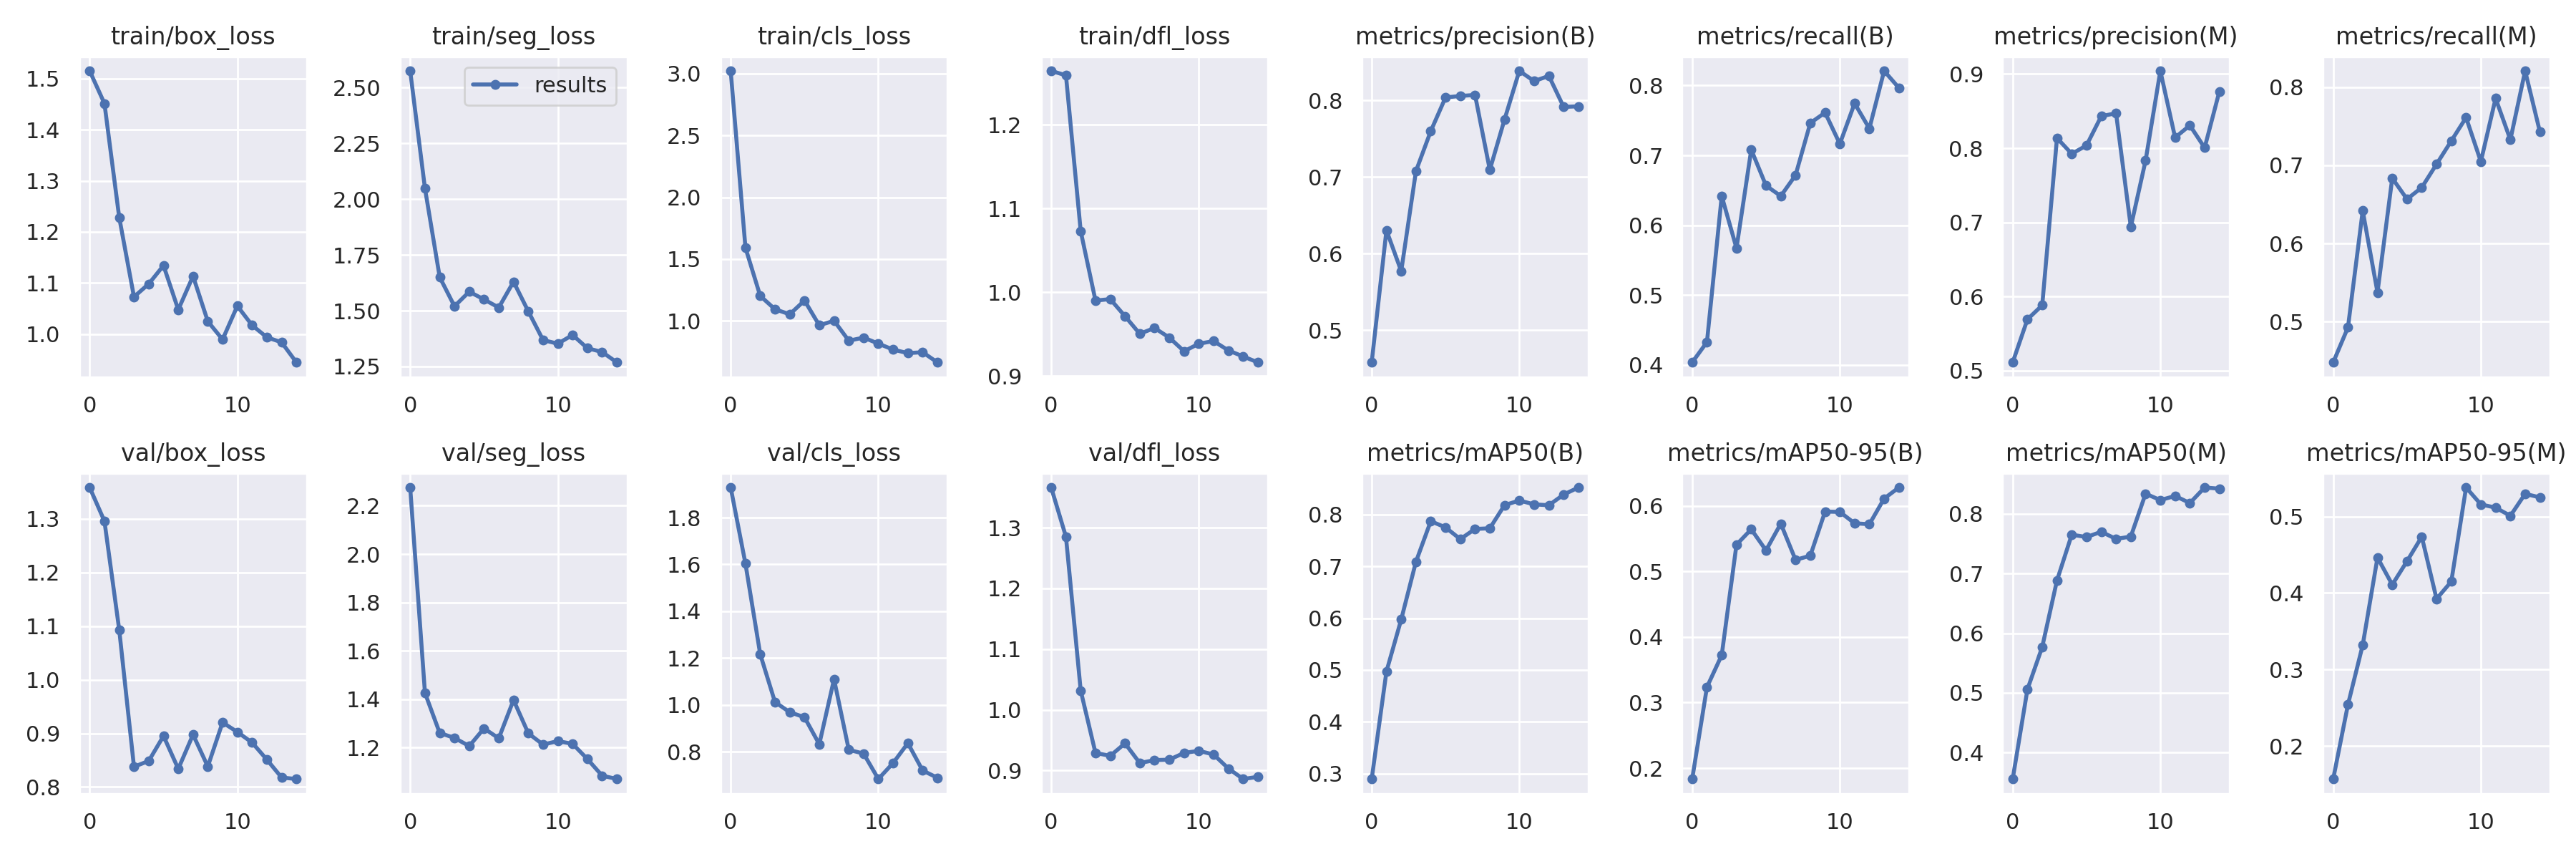

In [40]:
Image(filename=f'runs/segment/train/results.png', width=600)

### Validate Custom Model

In [41]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/best.pt' data='/content/drive/MyDrive/Visea_KITTI_Dataset/config.yaml'

2024-01-03 20:19:52.777359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 20:19:52.779564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 20:19:52.781483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 20:19:54.318496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1WLDTijF3_UIkW

### Inference with Custom Model

In [42]:
!yolo task=segment mode=predict model='/content/runs/segment/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/Visea_KITTI_Dataset/images/test' save=True hide_labels=False hide_conf=False, save_crop=True

2024-01-03 20:20:18.951713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 20:20:18.951759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 20:20:18.953025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 20:20:20.003642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
/usr/local/lib/python3.1

In [43]:
import os, glob
import cv2
import torch
from tqdm import tqdm
from ultralytics import YOLO

# Set the path to the folder containing images
image_folder_path = '/content/drive/MyDrive/Visea_KITTI_Dataset/images/test/'

# Set the path to the trained model
model_path = '/content/runs/segment/train/weights/last.pt'

# Initialize the YOLO model
model = YOLO(model_path)

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(image_folder_path) if file.endswith(".png")]

# Output folder
output_folder = '/content/predict2'

# Check if the output folder exists, create if not
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through the image files and predict on each
for image_file in tqdm(image_files, desc="Predicting"):
    image_path = os.path.join(image_folder_path, image_file)

    # Read the image
    img = cv2.imread(image_path)
    H, W, _ = img.shape

    # Perform prediction
    results = model(img)

    # Initialize an empty combined mask
    combined_mask = torch.zeros((H, W), dtype=torch.float32, device='cuda')

    # Iterate through the results and accumulate masks
    for j, result in enumerate(results):
        for mask in result.masks.data:
            # Resize each individual mask to match the dimensions of the input image
            mask_resized = torch.nn.functional.interpolate(mask.unsqueeze(0).unsqueeze(0), size=(H, W), mode="nearest").squeeze(0).squeeze(0)

            # Accumulate the masks
            combined_mask += mask_resized

    # Convert the combined mask to NumPy and resize
    combined_mask_cpu = combined_mask.cpu().numpy() * 255
    combined_mask_resized = cv2.resize(combined_mask_cpu, (W, H))

    # Save the combined mask
    output_path = os.path.join(output_folder, f'{os.path.splitext(image_file)[0]}.png')
    cv2.imwrite(output_path, combined_mask_resized)

Predicting:   0%|          | 0/25 [00:00<?, ?it/s]Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

0: 224x640 5 objects, 21.1ms
Speed: 0.3ms pre-process, 21.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Predicting:   4%|▍         | 1/25 [00:00<00:11,  2.15it/s]
0: 224x640 4 objects, 11.4ms
Speed: 0.4ms pre-process, 11.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 224x640 8 objects, 14.6ms
Speed: 0.4ms pre-process, 14.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Predicting:  12%|█▏        | 3/25 [00:00<00:04,  5.48it/s]
0: 224x640 5 objects, 14.8ms
Speed: 0.3ms pre-process, 14.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

0: 224x640 3 objects, 11.0ms
Speed: 0.4ms pre-process, 11.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Predicting:  20%|██ 

In [44]:
import os
import cv2
from tqdm import tqdm
import torch
from ultralytics import YOLO

# Set the path to the folder containing images
image_folder_path = '/content/drive/MyDrive/Visea_KITTI_Dataset/images/test/'

# Set the path to the trained model
model_path = '/content/runs/segment/train/weights/last.pt'

# Initialize the YOLO model
model = YOLO(model_path)

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(image_folder_path) if file.endswith(".png")]

# Iterate through the image files and predict on each
for image_file in tqdm(image_files, desc="Predicting"):
    image_path = os.path.join(image_folder_path, image_file)

    # Read the image
    img = cv2.imread(image_path)
    H, W, _ = img.shape

    # Perform prediction
    results = model(img)

    # Iterate through the results and save masks
    for result in results:
        for j, mask in enumerate(result.masks.data):
            # Move the CUDA tensor to CPU before processing
            mask_cpu = mask.cpu().numpy() * 255

            # Process and save the mask
            mask_resized = cv2.resize(mask_cpu, (W, H))
            # Output folder
            output_folder = '/content/prediction5'

            # Check if the output folder exists, create if not
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            output_path = os.path.join('/content/prediction5', f'{os.path.splitext(image_file)[0]}_{j}.png')
            cv2.imwrite(output_path, mask_resized)

Predicting:   0%|          | 0/25 [00:00<?, ?it/s]Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

0: 224x640 5 objects, 10.9ms
Speed: 0.3ms pre-process, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Predicting:   4%|▍         | 1/25 [00:00<00:07,  3.20it/s]
0: 224x640 4 objects, 12.0ms
Speed: 0.4ms pre-process, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 224x640 8 objects, 10.6ms
Speed: 0.4ms pre-process, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Predicting:  12%|█▏        | 3/25 [00:00<00:02,  8.21it/s]
0: 224x640 5 objects, 10.3ms
Speed: 0.3ms pre-process, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 224x640 3 objects, 10.4ms
Speed: 0.4ms pre-process, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Predicting:  20%|██ 

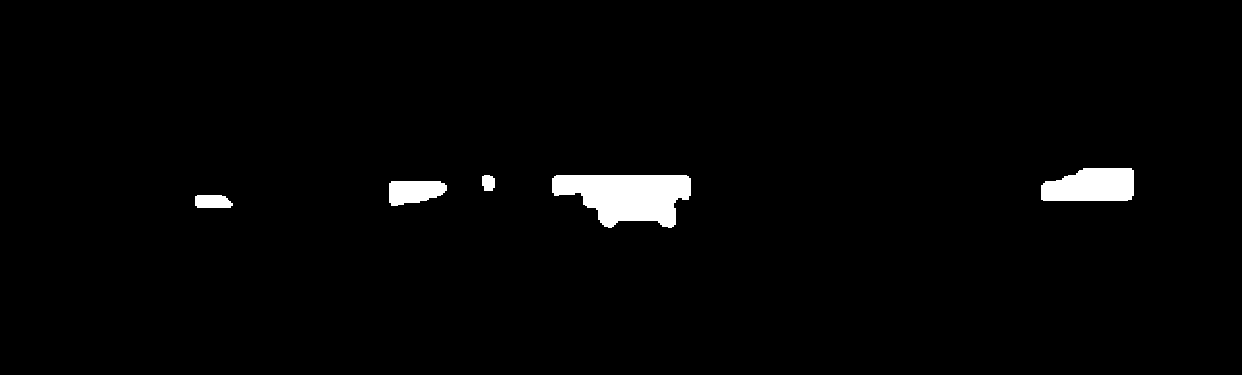

In [45]:
import glob
for image_path in glob.glob(f'/content/predict2/175.png')[:1]:
      display(Image(filename=image_path, height=375))
      print("\n")

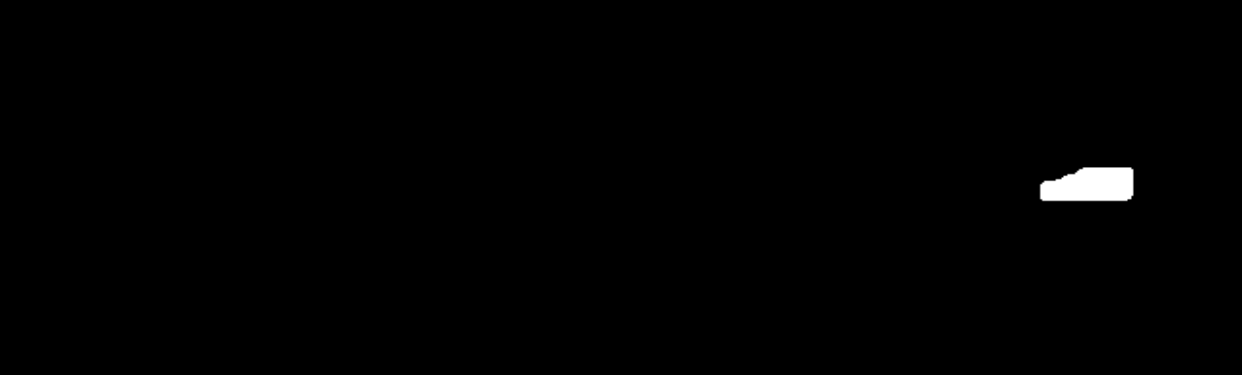

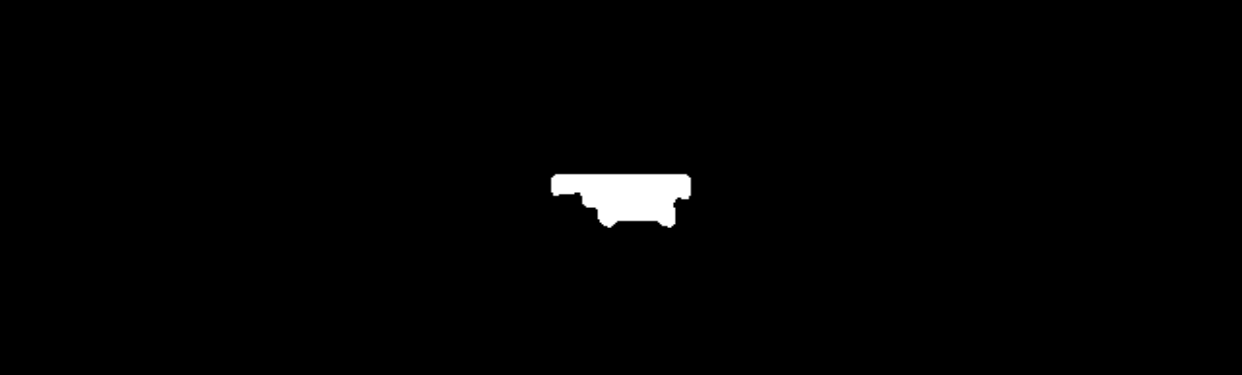

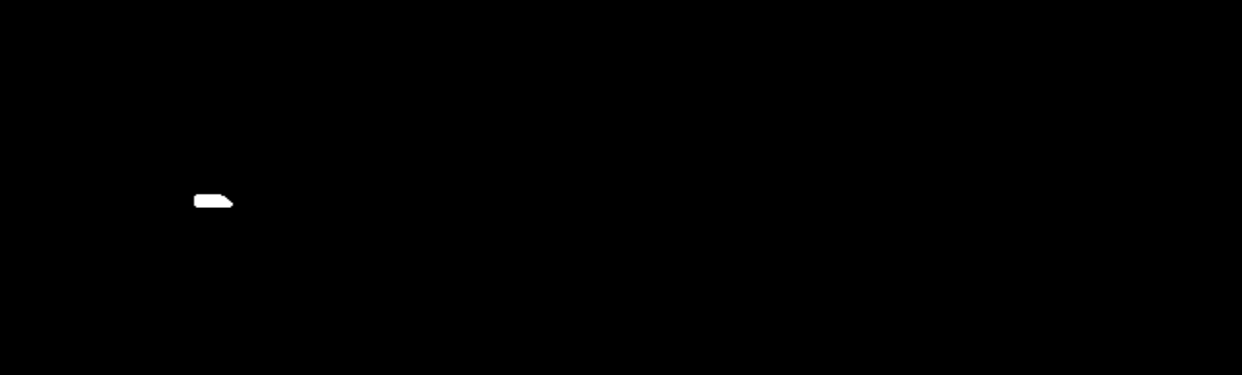

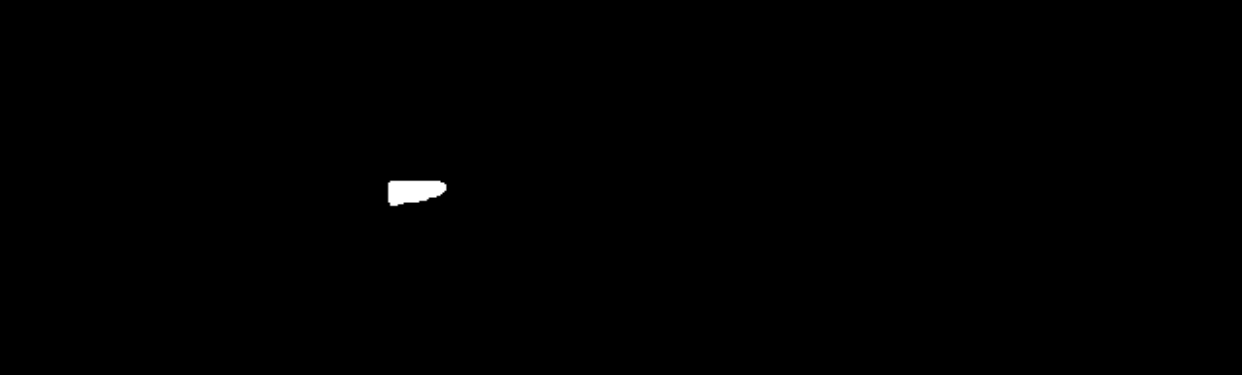

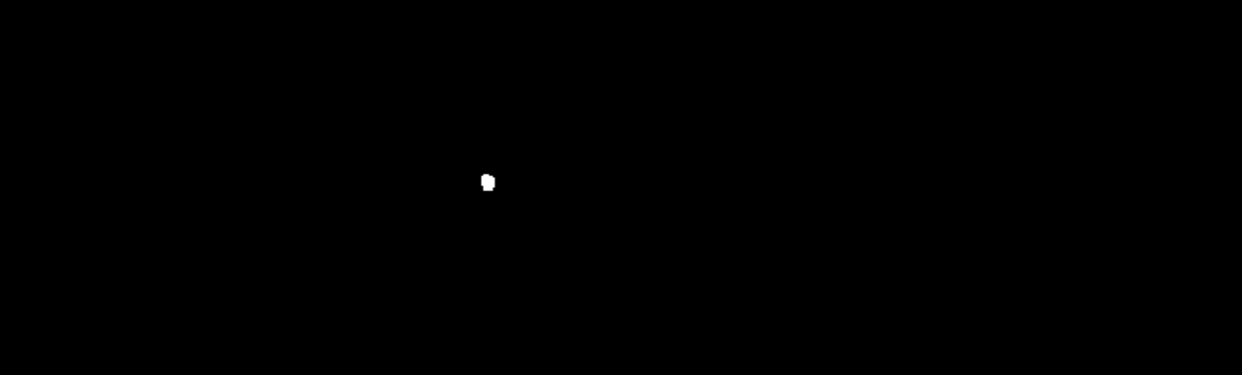

In [46]:
import glob
for image_path in glob.glob(f'/content/prediction/175_*.png')[:7]:
      display(Image(filename=image_path, width=1242, height=375))
      print("\n")

## CLASSIFICATION

In [49]:
import numpy as np


model_c = YOLO('/content/drive/MyDrive/classification_last_model.pt')  # sınıflandırma veri seti ile eğitimi yapılmış modelin ağırlıkları yüklenir

In [56]:
results_c = model_c('/content/prediction/175_1.png')  # predict on an image

#names_dict = results[0].names
names_dict = {0: 'Car', 1: 'Person'}
probs = results_c[0].probs.data.tolist()
print(names_dict)
print(probs)
print(names_dict[np.argmax(probs)])


image 1/1 /content/prediction/175_1.png: 320x320 Car 0.97, Person 0.03, 6.2ms
Speed: 0.5ms pre-process, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 320, 320)


{0: 'Car', 1: 'Person'}
[0.9672213196754456, 0.03277866542339325]
Car


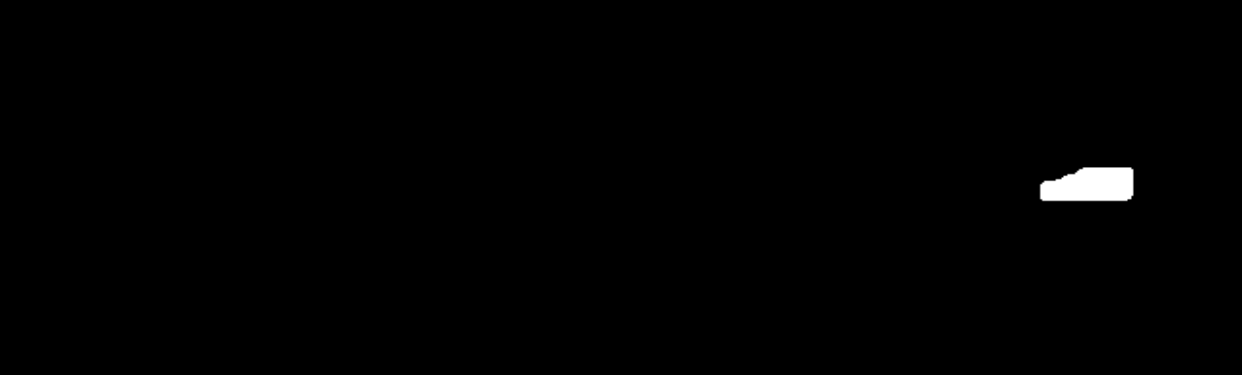

Car




In [58]:
display(Image(filename='/content/prediction/175_1.png', height=375))
print(names_dict[np.argmax(probs)])
print("\n")

## RESULT

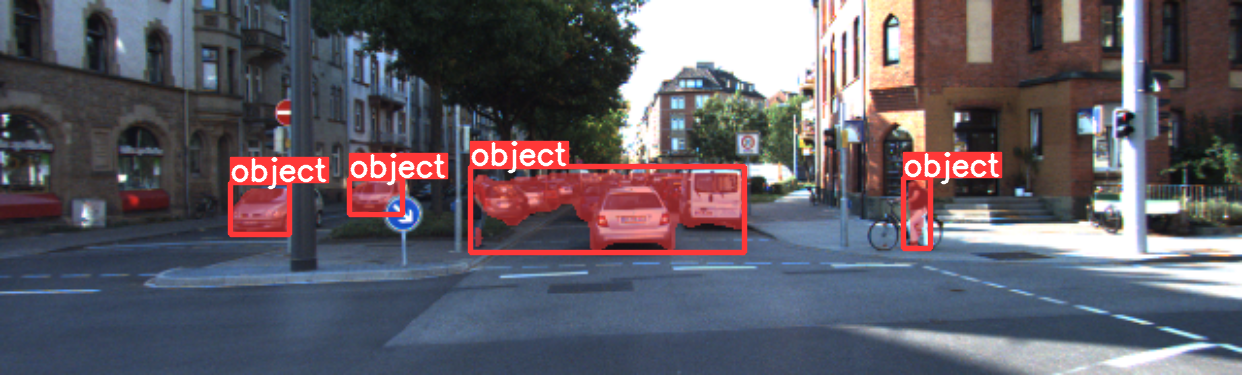

In [61]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/176.png')[:1]:
      display(Image(filename=image_path, height=600))
      print("\n")